<img src='./img/LogoWekeo_Copernicus_RGB_0.png' align='right' width='20%'></img>

# Tutorial: analysis of climate extremes
In this tutorial we will use the WEkEO Jupyterhub to access and analyse data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S). We will analyse climate extremes, and focus on the area surrounding the city of Lille in Northern France.

The tutorial comprises the following steps:

1. [Search and download](#search_download) data using the CDS API: We will focus on ERA5 reanalysis data of 2 metre (near-surface) temperature.
2. [Read data](#read_data): Once downloaded, we will read and understand the data, including its variables and coordinates.
3. [View and plot](#view_plot) maximum temperatures in September 2020.
4. [Calculate averages](#calculate_averages) of the maximum daily temperatures in September over the period from 1979 to 2019, and compare these with our findings for 2020.

<img src='./img/climate_extremes.png' align='center' width='100%'></img>

## <a id='search_download'></a>1. Search and download data

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the CDS, and importing the various python libraries that we will need.

#### Install CDS API

To install the CDS API, run the following command. We use an exclamation mark to pass the command to the shell (not to the Python interpreter).

In [1]:
!pip install cdsapi

  Created wheel for cdsapi: filename=cdsapi-0.3.1-py2.py3-none-any.whl size=11667 sha256=04db48880c4bcf4b698b35b5797952e584cc5526c04d59a3dd215c9beca3434d
  Stored in directory: c:\users\cxcs\appdata\local\pip\cache\wheels\47\6c\45\bf22055d6e91d3112c08fa92382ca11a3449fb27676a7db565
Successfully built cdsapi


#### Import libraries

We will be working with data in NetCDF format. To best handle this data we need a number of libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in particular Matplotlib and Cartopy.

In [84]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

#### Enter your CDS API key

Please follow the steps at this link to obtain a User ID and a CDS API key:
https://cds.climate.copernicus.eu/api-how-to

Once you have these, please enter them in the fields below by replacing "UID" with your User ID, and API_KEY with your API key.

In [26]:
!echo "url: https://cds.climate.copernicus.eu/api/v2" > ~/.cdsapirc
!echo "key: UID:API_KEY" >> ~/.cdsapirc

#### Search for data

To search for data, visit the CDS website: http://cds.climate.copernicus.eu
Here you can search for ERA5 data using the search bar. The data we need is the ERA5 hourly data on single levels from 1979 to present.

<img src='./img/CDS.jpg' align='left' width='45%'></img> <img src='./img/CDS_ERA5_hourly.png' align='right' width='45%'></img> 

Having selected the correct dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. These can all be selected in the **"Download data"** tab. In this tab a form appears in which we will select the following parameters to download. This time we will choose a subset area of 1x1 degrees, corresponding to a region of around 111km North/South and 72km East/West in Belgium and Northern France, around the city of Lille:

- Product type: `Reanalysis`
- Variable: `2m temperature`
- Year: `all`
- Month: `September`
- Day: `all`
- Time: `all`
- Geographical area: `North: 51`, `East: 4`, `South: 50`, `West: 3`
- Format: `NetCDF`

<img src='./img/Notebook3_data.png' align='center' width='100%'></img>

At the end of the download form, select **"Show API request"**. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below) ...

#### Download data

... having copied the API request into the cell below, running this will retrieve and download the data you requested into your local directory.

In [2]:
c = cdsapi.Client()

In [4]:
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': '2m_temperature',
        'year': [
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
        ],
        'month': '09',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            51, 3, 50,
            4,
        ],
    },
    'NFrance_hourly_Sep.nc')

2020-11-05 15:55:05,177 INFO Welcome to the CDS
2020-11-05 15:55:05,178 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2020-11-05 15:55:05,452 INFO Downloading http://136.156.132.198/cache-compute-0003/cache/data8/adaptor.mars.internal-1604588966.4929042-26458-29-06ab57ac-7e73-4311-8752-732b7b3a273f.nc to NFrance_hourly_Sep.nc (3M)
2020-11-05 15:55:06,150 INFO Download rate 4.3M/s   


Result(content_length=3146172,content_type=application/x-netcdf,location=http://136.156.132.198/cache-compute-0003/cache/data8/adaptor.mars.internal-1604588966.4929042-26458-29-06ab57ac-7e73-4311-8752-732b7b3a273f.nc)

## <a id='read_data'></a>2. Read Data

Now that we have downloaded the data, we can start to play ...

We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data. 

To read and process this data we will make use of the Xarray library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun! We will read the data from our NetCDF file into an Xarray **"dataset"**

In [85]:
filename = r'./NFrance_hourly_Sep.nc'
# Create Xarray Dataset
ds = xr.open_dataset(filename)

Now we can query our newly created Xarray dataset ...

In [86]:
ds

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 5, longitude: 5, time: 30240)
Coordinates:
  * longitude  (longitude) float32 3.0 3.25 3.5 3.75 4.0
  * latitude   (latitude) float32 51.0 50.75 50.5 50.25 50.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-09-01 ... 2020-09-30T23:00:00
Data variables:
    t2m        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-26 14:04:37 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

We see that the dataset has one variable called **"t2m"**, which stands for "2 metre temperature", and four coordinates of **longitude**, **latitude**, **expver** and **time**. Expver stands for 'experiment version'. Data up until the end of 2019 has expver value of 1. This is referred to as "operational data", while more recent data from 2020 has expver value of 5, which is near-real time data. After a period of time, near-real time data passes to the operational dataset.

Select the icons to the right of the table above to expand the attributes of the coordinates and data variables. What are the units of the temperature data?

While an Xarray **dataset** may contain multiple variables, an Xarray **data array** holds a single variable (which may still be multi-dimensional) and its coordinates. To make the processing of the **t2m** data easier, we convert in into an Xarray data array:

In [87]:
da = ds['t2m']

Let's convert the units of the 2m temperature data from Kelvin to degrees Celsius. The formula for this is simple: degrees Celsius = Kelvin - 273.15

In [88]:
t2m_C = da - 273.15

## <a id='view_plot'></a>3. View daily maximum 2m temperature for September 2020
We will plot the maximum values of 2m temperature over the subset area of Northern France.

First we average over the subset area:

In [89]:
Lille_t2m = t2m_C.mean(["longitude", "latitude"])

Now we select only the data for 2020, and only experiment version 5 (near-real time version of ERA5):

In [90]:
Lille_2020 = Lille_t2m.sel(expver=5)
Lille_2020 = Lille_2020.sel(time='2020')

We can now calculate the max daily 2m temperature for each day in September 2020:

In [91]:
Lille_2020_max = Lille_2020.groupby('time.day').max('time')

Let's plot the results in a chart:

Text(0.5, 1.0, 'Max daily t2m for Sep 2020')

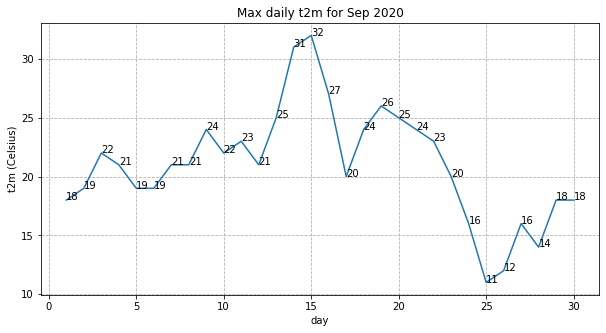

In [92]:
x = Lille_2020_max.day
y = (np.around(Lille_2020_max.values, 0)).astype(int)

fig = plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.set_ylabel('t2m (Celsius)')
ax.set_xlabel('day')
ax.plot(x, y)
ax.grid(linestyle='--')
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j))
ax.set_title('Max daily t2m for Sep 2020')

In [93]:
print('The maximum temperature in September 2020 in this area was', 
      np.around(Lille_2020_max.max().values, 1), 'degrees Celsius.')

The maximum temperature in September 2020 in this area was 32.1 degrees Celsius.


Which day in September had the highest maximum temperature?

Is this typical for Northern France? How does this compare with the long term average? We will seek to answer these questions in the next section.

## <a id='calculate_averages'></a>4. Calculate long term average of 2m temperature for September over Northern France
We will now seek to discover just how high the temperature for Lille in mid September 2020 was when compared to typical values exptected in this region at this time of year. To do that we will calculate the mean and standard deviation of maximum daily 2m temperature for each day in September for the period of 1979 to 2019, and compare these with our values for 2020.

First we select all data prior to 2020. This data has experiment version 1 (consolidated version of ERA5).

In [94]:
Lille_past = Lille_t2m.sel(expver=1)

Now we calculate the climatology for this data, i.e. the mean and standard deviation of maximum daily values for each of the days in September for a period of several decades (from 1979 to 2019).

To do this, we first have to extract the maximum daily value for each day in the time series:

In [133]:
Lille_max = Lille_past.resample(time='D').max()

Then we can calculate the mean and standard deviation of this for the 40 year time series for each day in September:

In [134]:
Lille_m = Lille_max.groupby('time.day').mean('time')
Lille_sd = Lille_max.groupby('time.day').std('time')

Let's plot this data. We will plot the mean plus and minus one standard deviation to have an idea of the expected range of maximum daily temperatures in this part of France in September:

Text(0.5, 1.0, 't2m climatology for Sep from 1979 to 2019')

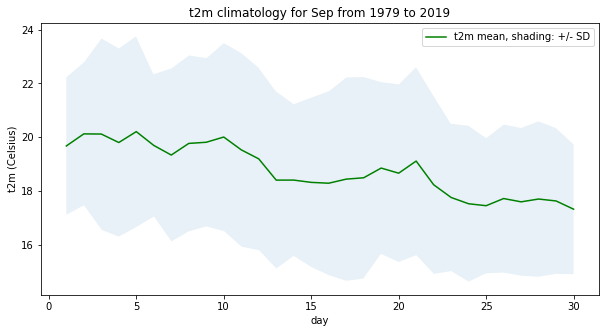

In [135]:
y1 = Lille_m
y2 = Lille_m + Lille_sd
y2 = np.squeeze(y2.values)
y3 = Lille_m - Lille_sd
y3 = np.squeeze(y3.values)

fig = plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.set_ylabel('t2m (Celsius)')
ax.set_xlabel('day')
ax.plot(Lille_m.day, y1, color='green', label='t2m mean, shading: +/- SD')
ax.plot(Lille_m.day, y2, color='white')
ax.plot(Lille_m.day, y3, color='white')
ax.fill_between(Lille_m.day, y2, y3, alpha=0.1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('t2m climatology for Sep from 1979 to 2019')

What is the typical range of maximum 2m temperature values for September 15?

We will now look more closely at the probability distribution of maximum temperatures for 15 September in this time period. To do this, we will first select only the max daily temperature for 15 September, for each year in the time series:

In [136]:
Lille_max = Lille_max.dropna('time', how='all')
Lille_15 = Lille_max[14::30]

We will then plot the histogram of this:

(array([ 2.,  3., 11.,  6.,  7.,  5.,  1.,  2.,  3.,  1.]),
 array([12.53629112, 13.94420452, 15.35211792, 16.76003132, 18.16794472,
        19.57585812, 20.98377151, 22.39168491, 23.79959831, 25.20751171,
        26.61542511]),
 <a list of 10 Patch objects>)

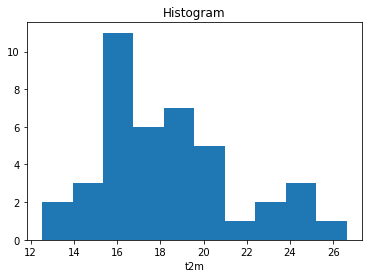

In [137]:
Lille_15.plot.hist()

Look at the range of maximum temperatures for 15 September in the period from 1979 to 2019. Has the temperature in this period ever exceeded that of 15 September 2020?

The histogram shows the distribution of maximum temperature of one day in each year of the time series, which corresponds to 41 samples. In order to increase the number of samples, let's plot the histogram of maximum temperatures on 15 September, plus or minus three days. This would increase our number of samples by a factor of seven.

To do this, we first need to produce an index that takes 15 Sep, plus or minus three days, from every year in the time series:

In [145]:
years = np.arange(41)
days_in_sep = np.arange(11,18)
index = np.zeros(287)
for i in years:
    index[i*7:(i*7)+7] = days_in_sep + (i*30)
index = index.astype(int)

Then we apply this index to filter the array of max daily temperature from 1979 to 2019: 

In [146]:
Lille_7days = Lille_max.values[index]

Now we can plot the histogram of maximum daily temperatures in days 12-18 September from 1979-2019:

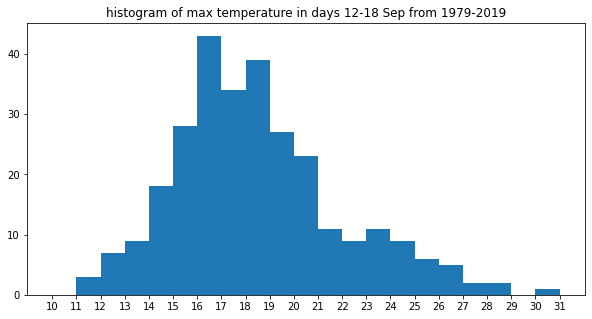

In [147]:
plt.figure(figsize=(10,5))
plt.hist(Lille_7days, bins = np.arange(10,32,1)) 
plt.title("histogram of max temperature in days 12-18 Sep from 1979-2019")
plt.xticks(np.arange(10,32,1))
plt.show()

Even in this increased temporal range, the maximum daily temperature still never reached that of 15 September 2020!

<hr>

<p><img src='./img/all_partners_wekeo.png' align='left' alt='Logo EU Copernicus' width='100%'></img></p>